In [13]:
# plotting one variable onto a histogram

import uproot 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def Plot_Variable(files, variable):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(5, 3), dpi=150)
    bin_dict = {
        "all_invariant_masses" : [0, 240, 40, "Dijet mass [GeV]"],
        "b_mH_ZZ" : [0, 220, 40, "Branch for mH coming from two Z bosons"],
        "b_mZ1_jj" : [0, 165, 50, "Branch for mZ1 coming from two jets"],
        "b_mZ2_jj" : [0, 165, 50, "Branch for mZ2 coming from two jets"],
        "Additional_Variable_Here" : [0, 100, 100, "Variable x label [GeV]"], # xmin, xmax, nbins, xlabel
        "jet_e" : [0, 150, 150, "Jet energy [GeV]"]
    }
    variable_info = bin_dict[variable]
    xmin, xmax, nbins, xlabel = variable_info[0], variable_info[1], variable_info[2], variable_info[3] # set binning and x label
    nevents = 2000
    ylabel = "Entries"
    normalize = 1

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["analysis"] # define events tree
        #t.keys() # print all branches # print all branches

        #takes all that is in the "variable" from the branch and arranges it into a numpy array
        variable_values = tree[variable].array(library="np")
        ## why do we take first n events only??
        variable_values = variable_values[:nevents] # take first nevents only
        variable_values = variable_values.flatten()
        #variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        ## what is the purpose of this normalize thing?
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        legend_entry = f.replace(".root", "")
        ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step') 

    fontsize = 13
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend(fontsize = 4, loc = 'upper right')
    
    fig.tight_layout()
    fig.show()

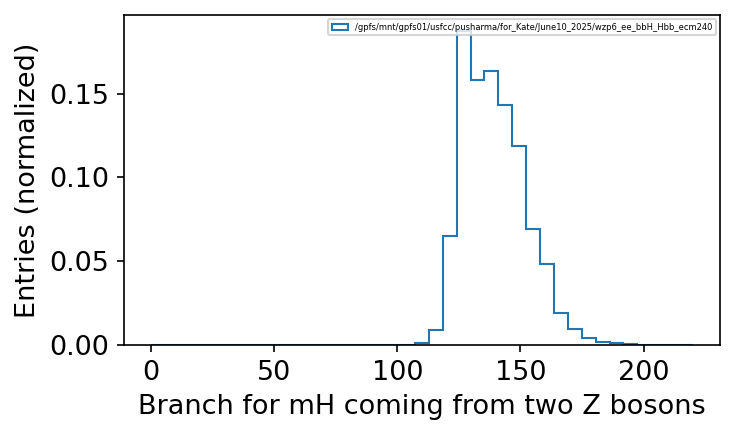

In [2]:
Plot_Variable(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"], "b_mH_ZZ")

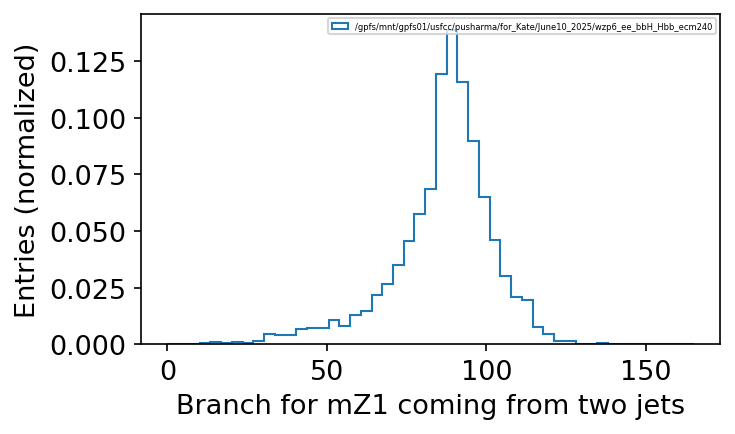

In [3]:
Plot_Variable(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"], "b_mZ1_jj")

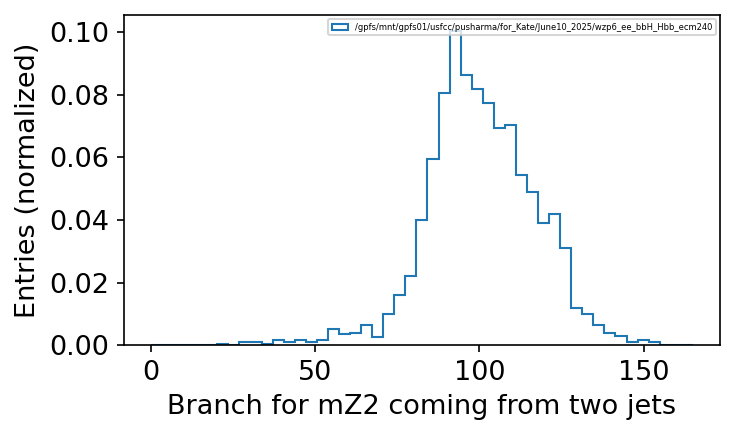

In [4]:
Plot_Variable(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"], "b_mZ2_jj")

In [14]:
import uproot 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def Plot_Variable_Together(files, variable):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(5, 3), dpi=150)
    bin_dict = {
        "all_invariant_masses" : [0, 240, 40, "Dijet mass [GeV]"],
        "b_mH_ZZ" : [0, 220, 40, "Branch for mH coming from two Z bosons"],
        "b_mZ1_jj" : [0, 165, 50, "Branch for mZ1 coming from two jets"],
        "b_mZ2_jj" : [0, 165, 50, "Branch for mZ2 coming from two jets"],
        "Additional_Variable_Here" : [0, 100, 100, "Variable x label [GeV]"], # xmin, xmax, nbins, xlabel
        "jet_e" : [0, 150, 150, "Jet energy [GeV]"]
    }
    variable_info = bin_dict[variable]
    xmin, xmax, nbins, xlabel = variable_info[0], variable_info[1], variable_info[2], variable_info[3] # set binning and x label
    nevents = 2000
    ylabel = "Entries"
    normalize = 1

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["analysis"] # define events tree
        #t.keys() # print all branches # print all branches

        #takes all that is in the "variable" from the branch and arranges it into a numpy array
        variable_values = tree[variable].array(library="np")
        variable_values = variable_values[:nevents] # take first nevents only
        variable_values = variable_values.flatten()
        #variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        legend_entry = f.replace(".root", "")
        ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step') 

    fontsize = 13
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend(fontsize = 4, loc = 'upper right')
    
    fig.tight_layout()
    fig.show()

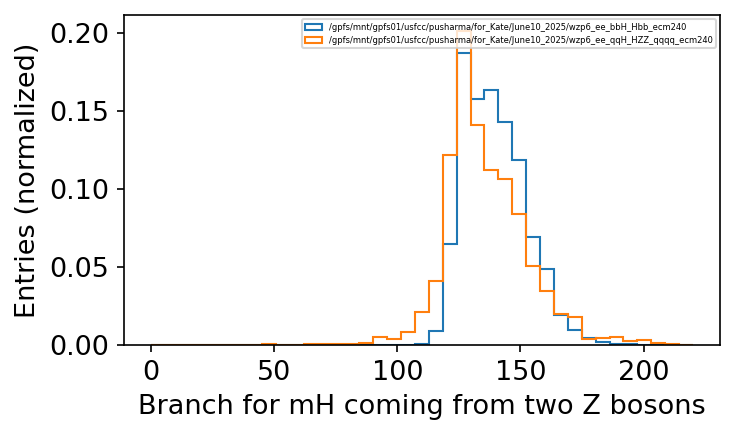

In [7]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mH_ZZ") 

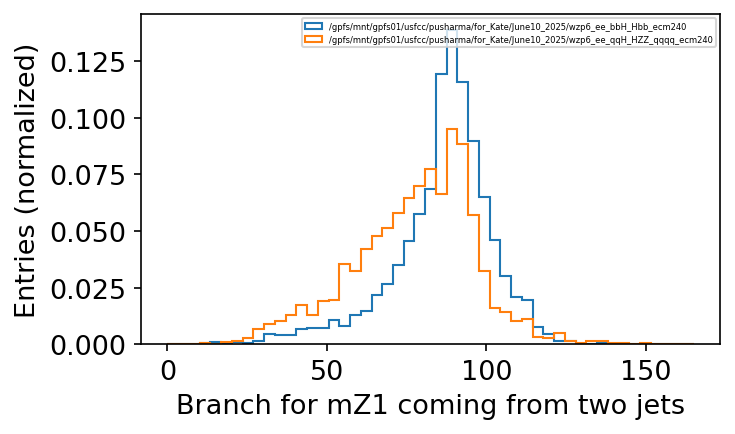

In [8]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZ1_jj") 

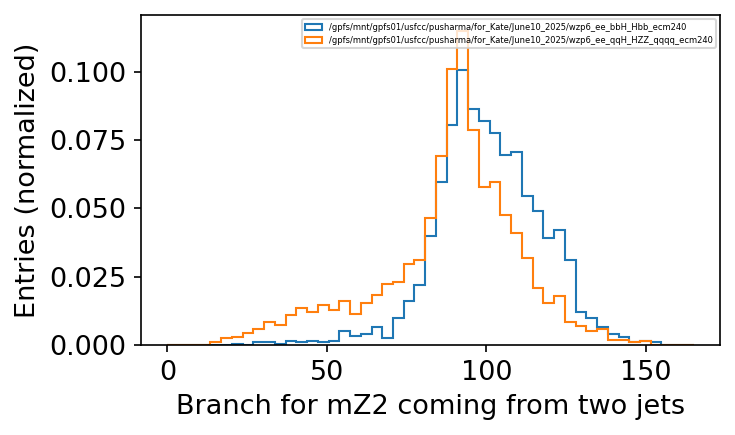

In [9]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZ2_jj") 

In [54]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [64]:
file1 = "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"
file2 = "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"

# turning the two analysis TTrees from the two ROOT files into pd dataframes
# file 1
u_f1 = uproot.open(file1)
tree1 = u_f1["analysis"]
df1 = tree1.arrays(tree1.keys(), library="pd")
df1['Label'] = 0

#file 2
u_f2 = uproot.open(file2)
tree2 = u_f2["analysis"]
df2 = tree2.arrays(tree2.keys(), library="pd")
df2['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([df1, df2])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.30, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train[tree1.keys()[:-1]]
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test[tree2.keys()[:-1]]
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 15, max_features = 5)
print(gbc.fit(X_train, y_train))

y_pred = gbc.predict_proba(X_test)

GradientBoostingClassifier(max_features=5, random_state=15)


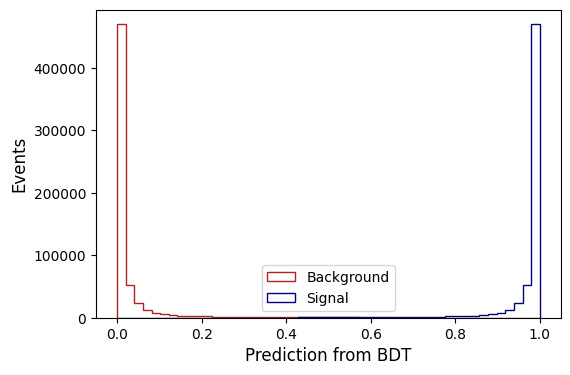

In [69]:
prob_bac = y_pred[:, 0]
prob_sig = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_bac, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Background')
plt.hist(prob_sig, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

In [59]:
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

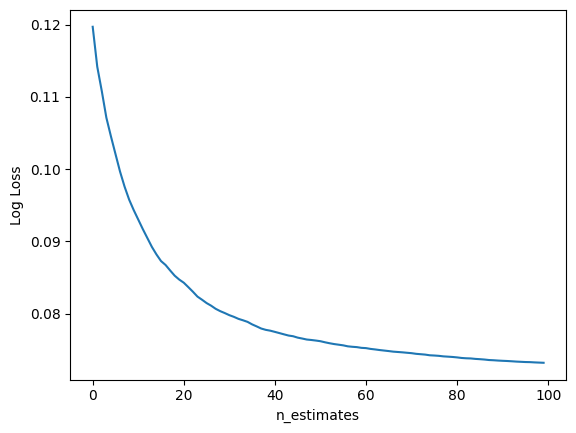

In [75]:
log_losses = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses.append(loss)

plt.plot(log_losses)
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.show()

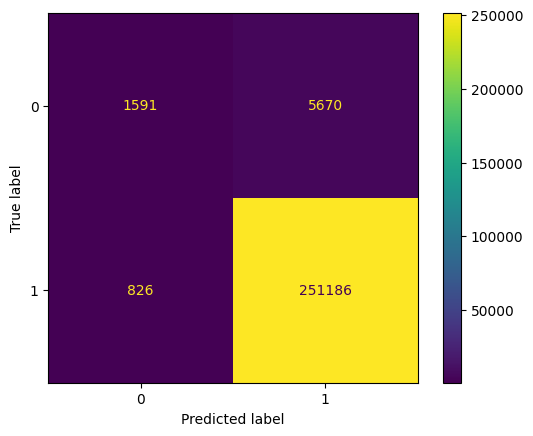

In [67]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

AUC score:  0.9460295933315592


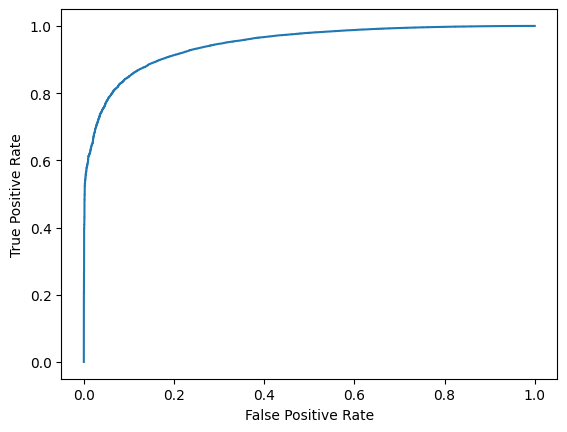

In [76]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

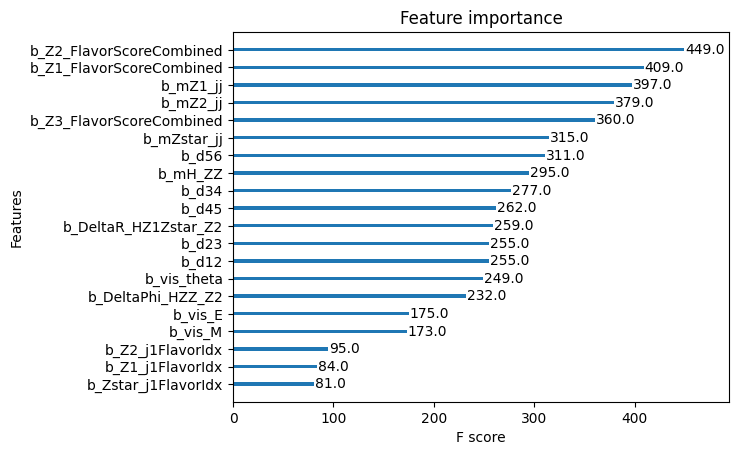

In [63]:
# using xgb

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)